<a href="https://colab.research.google.com/github/vavana619/quant_machine/blob/main/%5B5%EC%9E%A5%5D_%EA%B0%80%EC%B9%98%EC%A3%BC%EB%A5%BC_%EC%B0%BE%EB%8A%94_%EA%B8%B0%EC%88%A0_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. 가치지표 결합하기

## 1) 교집합
: 각각 하위 20개 종목을 변수에 저장

In [2]:
pip install finterstellar

     |████████████████████████████████| 109 kB 4.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [8]:
import finterstellar as fs
OTP = '16500294061189711897'

In [9]:
t = '2021Q3' # 2021년 3분기
data = fs.fn_consolidated(otp=OTP, term=t, vol=0) # 해당 분기의 모든 재무제표 데이터 불러오기
data['PER'] = data['Price_M3'] / data['EPS'] # PER 계산
data['PBR'] =  data['Price_M3'] / (data['Shareholders Equity'] / data['Shares']) # PBR 계싼
s1 = fs.fn_filter(data, by='PER', floor=1, cap=10, n=20, asc=True) # PER 기준 하위 20개 종목 선택
s2 = fs.fn_filter(data, by='PBR', floor=.1, cap=1, n=20, asc=True) # PER 기준 하위 20개 종목 선택

2021Q3...OK


우선 데이터를 가져와서 PER과 PBR의 시그널을 만들기 -> 겹치는 종목이 단 하나 존재

In [9]:
print(s1) # s1 확인

             PER
symbol          
MFG     1.101084
ASTL    1.141499
MITT    1.164773
COHN    1.197251
QD      1.212500
SHEN    1.219512
VIPS    1.308411
LBTYK   1.326878
LBTYA   1.344644
MTL     1.359672
NMM     1.425568
SSSS    1.445312
AGIO    1.456358
HOV     1.495945
DTEA    1.519608
FYBR    1.524031
NNBR    1.547170
DAC     1.632765
MARK    1.677966
CPG     1.766399


In [10]:
print(s2) # s2 확인

             PBR
symbol          
ICD     0.100246
TNP     0.105982
RVI     0.115185
QD      0.126433
RCEL    0.133777
GNW     0.134417
GASS    0.140216
AEI     0.151292
SMLP    0.151440
RIG     0.160018
GURE    0.160620
ACOR    0.161745
HAPP    0.168090
HEXO    0.170961
TUSK    0.178395
CORR    0.180392
YPF     0.188682
KEP     0.189478
SMHI    0.191086
WHLR    0.192041


In [11]:
fs.combine_signal(s1, s2, how='and') # 교집합으로 종목 선택 (and)

,PER,PBR
symbol,,
QD,1.2125,0.126433


In [12]:
fs.combine_signal(s1, s2, how='or') # 합집합으로 종목 선택도 가능 (or)

,PER,PBR
symbol,,
ACOR,NaN,0.161745
AEI,NaN,0.151292
AGIO,1.456358,NaN
ASTL,1.141499,NaN
COHN,1.197251,NaN
CORR,NaN,0.180392
CPG,1.766399,NaN
DAC,1.632765,NaN
DTEA,1.519608,NaN


## 2) 합산점수

## `fn_score(data, by, method, floor, cap, asc)` : 점수 합산용 내장 함수

* data : 입력용 재무제표 데이터 프레임
* by : 산출 기준 지표
* method : 산출 방법
* floor : 최저값
* cap : 최댓값
* asc : 배점 순서를 오름차순(True) 혹은 내림차순(False)로 정렬

In [13]:
# 절대평가
s1 = fs.fn_score(data, by='PER', method='absolute', floor=1, cap=10, asc=True) # PER 기준 절대점수 계산
s2 = fs.fn_score(data, by='PBR', method='absolute', floor=.1, cap=1, asc=True) # PBR 기준 절대점수 계산

In [14]:
print(s1) # PER 기준 절대함수 확인

              PER  Score
symbol                  
MFG      1.101084   98.9
ASTL     1.141499   98.4
MITT     1.164773   98.2
COHN     1.197251   97.8
QD       1.212500   97.6
...           ...    ...
HNNA     9.971963    0.3
WBK      9.990282    0.1
OSBC     9.992063    0.1
INTC    10.000000    0.0
BDSI    10.000000    0.0

[645 rows x 2 columns]


In [15]:
print(s2) # PBR 기준 절대함수 확인

             PBR  Score
symbol                 
ICD     0.100246  100.0
TNP     0.105982   99.3
RVI     0.115185   98.3
QD      0.126433   97.1
RCEL    0.133777   96.2
...          ...    ...
WHF     0.998371    0.2
BCBP    0.998491    0.2
CARE    0.998777    0.1
ADV     0.999052    0.1
TRVG    0.999495    0.1

[686 rows x 2 columns]


절대평가한 내용을 기반으로 합산 -> combine_score() 함수를 이용해 합산하며 입력으로 합산할 데이터프레임과 데이터 개수를 보내줌

In [16]:
fs.combine_score(s1, s2, n=10) # 절대 합산 점수 계산 상위 10개 종목

,Score,Score_,Sum
symbol,,,
QD,48.80,48.55,97.35
GNW,44.10,48.10,92.20
MITT,49.10,36.85,85.95
COHN,48.90,36.90,85.80
EDTK,42.15,42.70,84.85
MFG,49.45,34.45,83.90
BHAT,44.20,39.65,83.85
GLOP,38.55,43.25,81.80
NMM,47.65,33.10,80.75


In [17]:
# 상대평가
s1 = fs.fn_score(data, by='PER', method='relative', floor=1, cap=10, asc=True) # PER 기준 상대점수 계산
s2 = fs.fn_score(data, by='PBR', method='relative', floor=.1, cap=1, asc=True) # PBR 기준 상대점수 계산

In [18]:
print(s1) # PER 기준 상대함수 확인

              PER  Score
symbol                  
MFG      1.101084  100.0
ASTL     1.141499   99.8
MITT     1.164773   99.7
COHN     1.197251   99.5
QD       1.212500   99.4
...           ...    ...
HNNA     9.971963    0.6
WBK      9.990282    0.5
OSBC     9.992063    0.3
INTC    10.000000    0.2
BDSI    10.000000    0.2

[645 rows x 2 columns]


In [19]:
print(s2) # PBR 기준 상대함수 확인

             PBR  Score
symbol                 
ICD     0.100246  100.0
TNP     0.105982   99.9
RVI     0.115185   99.7
QD      0.126433   99.6
RCEL    0.133777   99.4
...          ...    ...
WHF     0.998371    0.7
BCBP    0.998491    0.6
CARE    0.998777    0.4
ADV     0.999052    0.3
TRVG    0.999495    0.1

[686 rows x 2 columns]


In [20]:
fs.combine_score(s1, s2, n=10) # 상대 합산 점수 계산 상위 10개 종목

,Score,Score_,Sum
symbol,,,
QD,49.70,49.80,99.50
GNW,47.45,49.65,97.10
MITT,49.85,45.10,94.95
COHN,49.75,45.20,94.95
EDTK,46.75,47.75,94.50
BHAT,47.60,46.20,93.80
MFG,50.00,43.65,93.65
GLOP,44.50,47.95,92.45
WB,45.95,46.30,92.25


# 4. 가치투자 4대장 콤보
: 4가지 방법(PER, PBR, PSR, PCR 지표)을 한 번에 섞어서 사용

### [슈퍼가치전략]
1. *시가총액(= 주식x주식수) 하위 20% 주식*을 뽑아냄
2. 뽑아낸 주식을 대상으로 PER, PBR, PSR, PCR 지표 순위를 매김
3. 네 지표의 순위를 더해 종합 순위를 매김
4. *종합 순위가 높은 상위 50개 종목*에 투자
5. 연 1회 리밸런싱하기


In [21]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
terms

Index(['2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
       '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4', '2014Q1',
       '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4',
       '2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
       '2017Q4', '2018Q1', '2018Q2', '2018Q3', '2018Q4', '2019Q1', '2019Q2',
       '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3', '2020Q4'],
      dtype='object')

In [22]:
# 분기별 재무제표 데이터 불러오기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp=OTP, term=t)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [23]:
# 시가총액, PER, PBR, PSR, PCR 계산 (주가는 모두 3개월 후 주가(Price_M3)를 이용)
for t in terms:
  data[t]['Market Cap'] = data[t]['Price_M3'] + data[t]['Shares'] # 시가총액 계싼
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS'] # PER 계산
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares']) # PBR 계산
  data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares']) # PSR 계산
  data[t]['PCR'] = data[t]['Price_M3'] / ((data[t]['Net Income'] + data[t]['Depreciation']) / data[t]['Shares']) # PCR 계산

In [25]:
data['2020Q4'].sort_values(by='Market Cap', ascending=False).head() # 시가총액을 기준으로 내림차순 정렬

,term,Revenue,COGS,Gross Profit,SG&A,Operating Income,Net Income,EPS,EBITDA,EBIT,...,name,name_kr,sector,industry,avg_volume,Market Cap,PER,PBR,PSR,PCR
symbol,,,,,,,,,,,,,,,,,,,,,
AMX,2020Q4,48024.4,24375.90,23648.50,10010.70,8289.00,2106.21,0.0981,9999.5500,8289.00,...,America Movil SAB de CV ADR Series L,아메리카 모빌 ADR 시리즈 L,Communication Services,Telecom Services,3185430,66876.58,138.430173,72.138457,18.907046,95.587351
EC,2020Q4,65290.4,48837.70,16452.70,4385.10,9336.29,2062.68,0.2100,21458.2000,9336.29,...,Ecopetrol SA ADR,에코페트롤 ADR,Energy,Oil & Gas Integrated,1051900,41129.82,61.047619,7.579094,8.073468,37.161477
AAPL,2020Q4,294239.0,179823.00,114416.00,20350.00,74253.00,63930.00,3.7175,85508.0000,74253.00,...,Apple Inc,애플,Technology,Consumer Electronics,186217000,17057.15,32.858104,31.236565,7.030374,27.641914
ABEV,2020Q4,11492.7,5428.27,6064.44,3355.91,3184.49,2206.29,0.1429,3719.0400,3184.49,...,Ambev SA ADR,암베브 ADR,Consumer Defensive,Beverages Brewers,27012500,15737.74,19.174248,2.957200,3.751416,13.436270
CX,2020Q4,13065.5,8853.19,4212.35,2742.52,-436.00,-1464.69,-1.0250,-92.9819,-436.00,...,Cemex SAB de CV ADR,시멕스 ADR,Basic Materials,Building Materials,10225900,14714.97,-6.800000,12.679106,7.846218,-935.780557


* 소형주를 뽑아내기 위해 시가총액 기준으로 필터링하고, PER, PBR, PSR, PCR의 상대 점수를 구하기
* 매겨진 점수는 각 s1~5까지 딕셔너리에 저장

In [26]:
s1 = {}
s2 = {}
s3 = {}
s4 = {}
s5 = {}

for t in terms:
  s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=True) # 시가총액 하위 1000개 종목 선정
  s2[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True) # PER 기준 상대점수 계산
  s3[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True) # PBR 기준 상대점수 계산
  s4[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True) # PSR 기준 상대점수 계산
  s5[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True) # PCR 기준 상대점수 계산

* PER, PBR, PSR, PCR은 각각 매겨진 점수를 조합해 합산 점수를 만듦
* s6 딕셔너리에는 4대장 콤보의 합산 점수가 담겨있음

In [27]:
s6 = {}
for t in terms:
  s6[t] = fs.combine_score(s2[t], s3[t], s4[t], s5[t]) # PER, PBR, PSR, PCR 기준 상대점수 합산

* *소형주만* 골라낸 후 점수가 높은 순서대로 *상위 50개*를 뽑아내기
* 최종 조합은 s 딕셔너리에 담기
* s1와 s6의 조합을 만들 때는 합산 점수가 아닌 *교집합*을 구하기
* 교집합을 하기 위해 **combine_signal() 함수**를 이용해 *분기별 50개 종목* 선정

In [28]:
s = {}
signal = {}

for t in terms:
  s[t] = fs.combine_signal(s6[t], s1[t], how='and', n=50) # 상대점수 합산 후 하위 50개 종목 선정
  signal[t] = list(s[t].index) # 선정된 종목 저장

In [29]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 백테스팅 -> 좋은 결과는 아님

CAGR: 12.27%
Accumulated return: 218.50%
Investment period: 10.0yrs
Sharpe ratio: 0.72
MDD: -43.96%


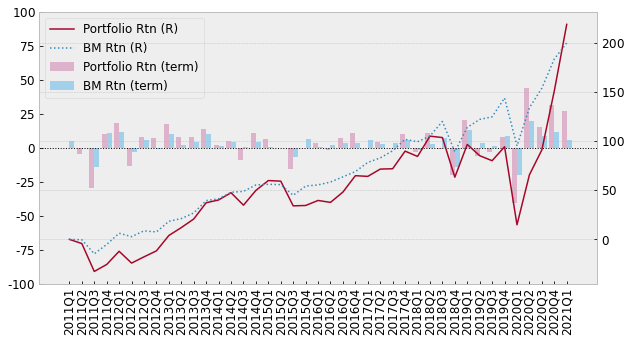

In [30]:
fs.draw_return(df) # 기간별 수익률 그래프 그려보기

-> 2020년 1분기에 수익률이 반토막 나며 그 동안 쌓아올린 수익을 모두 날려버림 -> 코로나19 대폭락이 슈퍼가치전략을 완전히 무너뜨림 (그 이후 급격한 회복세를 그리며 수익률이 올라옴)

In [31]:
# 4대장 + 대형주 전략 코드 모아쓰기
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp=OTP, term=t)

s1, s2, s3, s4, s5, s6 = {}, {}, {}, {}, {}, {}
s, signal = {}, {}

for t in terms:
  data[t]['Market Cap'] = data[t]['Price_M3'] + data[t]['Shares'] # 시가총액 계싼
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS'] # PER 계산
  data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity'] / data[t]['Shares']) # PBR 계산
  data[t]['PSR'] = data[t]['Price_M3'] / (data[t]['Revenue'] / data[t]['Shares']) # PSR 계산
  data[t]['PCR'] = data[t]['Price_M3'] / ((data[t]['Net Income'] + data[t]['Depreciation']) / data[t]['Shares']) # PCR 계산

  s1[t] = fs.fn_filter(data[t], by='Market Cap', floor=0, n=1000, asc=False) # 시가총액 상위 1000개 종목 선정 (수정한 부분!)
  s2[t] = fs.fn_score(data[t], by='PER', method='relative', floor=1, asc=True) # PER 기준 상대점수 계산
  s3[t] = fs.fn_score(data[t], by='PBR', method='relative', floor=.1, asc=True) # PBR 기준 상대점수 계산
  s4[t] = fs.fn_score(data[t], by='PSR', method='relative', floor=.1, asc=True) # PSR 기준 상대점수 계산
  s5[t] = fs.fn_score(data[t], by='PCR', method='relative', floor=.1, asc=True) # PCR 기준 상대점수 계산

  s6[t] = fs.combine_score(s2[t], s3[t], s4[t], s5[t]) # PER, PBR, PSR, PCR 기준 상대점수 합산

  s[t] = fs.combine_signal(s6[t], s1[t], how='and', n=50) # 상대점수 합산 후 하위 50개 종목 선정
  signal[t] = list(s[t].index) # 선정된 종목 저장

df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 백테스팅 -> 좋은 결과는 아님

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 6.97%
Accumulated return: 96.34%
Investment period: 10.0yrs
Sharpe ratio: 0.37
MDD: -45.76%


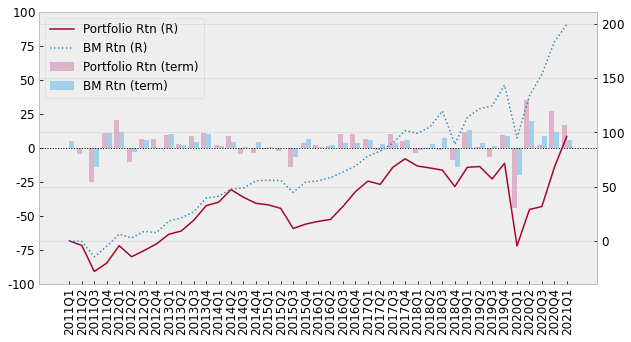

In [32]:
fs.draw_return(df) # 기간별 수익률 그래프 그려보기

-> 소형주로 했을 때보다 수익률이 더 내려갔으며 그래프를 보면 소형주에 투자했을 경우와 트렌드는 같지만, 상승의 속도가 다름 (상승장에서 소형주가 대형주보다 상승률이 더 높았다는 뜻)

# 5. 실적 대비 기업가치, EV/EBITDA & EV/Sales

* **EV(Enterprise Value)** : 지분가치와 더불어 부채까지 해결하는데 필요한 비용, *기업을 인수하는데 들어가는 총비용*
  * EV = 시가총액 + 순차입금 = 시가총액 + (차입금 - 현금성자산)
  * 다른 재무제표 지표와 결합해 멀티플을 만들어 기업가치를 상대평가 하는데 이용됨 (EV/EBITDA, EV/Sales)

* **EV/EBITDA** : 당기순이익에서 이자, 세금, 감가상각비를 제외하기 전 영업이익을 뜻하며, 재무제표의 영업이익항목에 감가상각비를 더한 금액

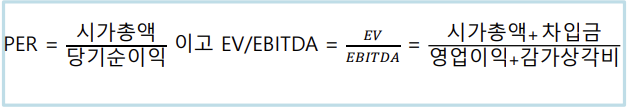

* **EV/Sales** : EV를 매출액으로 나눈 값 (PSR과 활용도와 비슷)

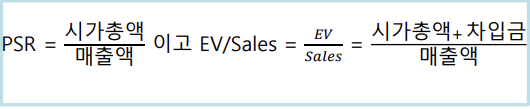

In [38]:
df = fs.fn_single(otp=OTP, symbol='NKE', window='T') # 나이키(NKE) 재무제표 데이터 불러오기

* EV를 계산하고 EV/EBITDA 추이를 차트로 그려보기
  * **시가총액 = 주가 X 주식수**
  * **EV = 시가총액 + 차입금 - 현금성자산**

In [39]:
df['Market Cap'] = df['Price'] * df['Shares'] # 시가총액 계산
df['EV'] = df['Market Cap'] + df['Long Term Debt'] + df['Current Debt'] - df['Cash & Equivalents'] # EV 계산

In [40]:
df['EV/EBITDA'] = df['EV'] / df['EBITDA'] # 'EV/EBITDA 계산

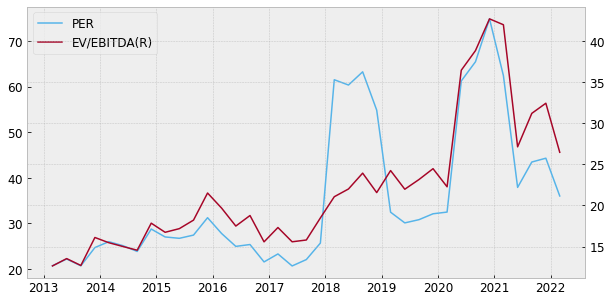

In [41]:
# 'EV/EBITDAdhk PER 비교
df['PER'] = df['Price'] / df['EPS'] # PER 계산
fs.draw_chart(df, left='PER', right='EV/EBITDA') # PER 대비 EV/EBITDA 비교

-> 2018년 한 해를 제외하고 EV/EBITDA와 PER이 동행하는 모습을 볼 수 있음 (나이키가 2018년에 세금을 몰아서 낸 기록이 있음 = EV/EBITDA의 분모에 이용되는 EBITDA가 세금의 영향을 받음)

* EV를 계산하고 EV/Sales 추이를 차트로 그려보기
  * **EV/Sales = EV/매출액**

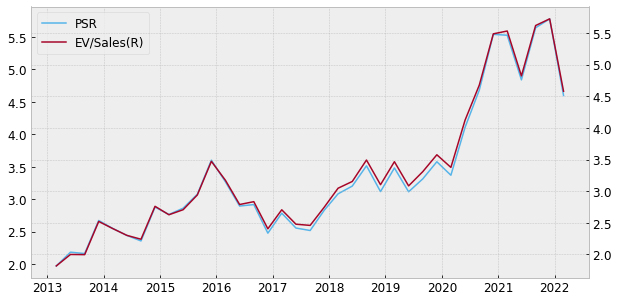

In [42]:
df['EV/Sales'] = df['EV'] / df['Revenue'] # EV/Sales 계산
df['PSR'] = df['Price'] / (df['Revenue'] / df['Shares']) # PSR 계산
fs.draw_chart(df, left='PSR', right='EV/Sales') # PSR 대비 EV/Sales 비교

-> 두 그래프가 딱 붙어있음 (비슷한 콘셉트로 만들어진 지표라 결괏값 역시 비슷하게 나옴)

### [분기별로 EV/EBITDA 값이 낮은 순서대로 상위 30개 종목에 투자하는 전략을 테스트]

In [11]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp=OTP, term=t) # 분기별 재무제표 데이터 불러오기

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [12]:
for t in terms:
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 분기별 시가총액 계산
  data[t]['EV'] = data[t]['Market Cap'] + data[t]['Long Term Debt'] + data[t]['Current Debt'] - data[t]['Cash & Equivalents'] # 분기별 EV 계산

In [13]:
for t in terms:
  data[t]['EV/EBITDA'] = data[t]['EV'] / data[t]['EBITDA'] # 분기별 EV/EBITDA 계산
  data[t].loc[(data[t]['EV'] <= 0) | (data[t]['EBITDA'] <= 0), 'EV/EBITDA'] = float('nan') # EV가 음수 or EBITDA가 음수일 경우, 'nan'으로 처리

In [14]:
s = {}
signal = {}

for t in terms:
  s[t] = fs.fn_filter(data[t], by='EV/EBITDA', floor=0, n=30, asc=True) # EV/EBITDA 기준 하위 30개 종목 선정
  signal[t] = list(s[t].index) # 선정된 종목 저장

In [15]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 백테스팅

CAGR: 9.03%
Accumulated return: 137.61%
Investment period: 10.0yrs
Sharpe ratio: 0.45
MDD: -51.88%


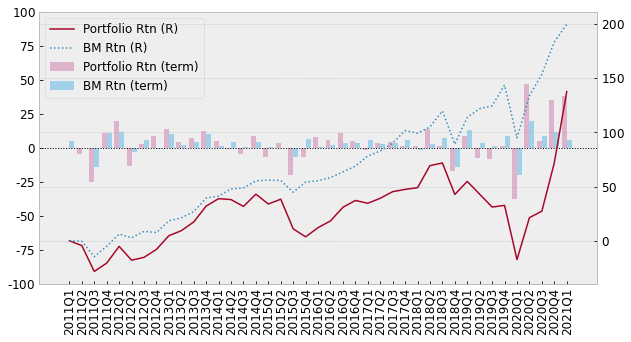

In [16]:
fs.draw_return(df) # 기간별 수익률 그래프

### [분기별로 EV/Sales 값이 낮은 순서대로 상위 30개 종목에 투자하는 전략을 테스트]

In [17]:
# EV/Sales 백테스팅 코드 모아보기
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp=OTP, term=t) # 분기별 재무제표 데이터 불러오기

s = {}
signal = {}
for t in terms:
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 분기별 시가총액 계산
  data[t]['EV'] = data[t]['Market Cap'] + data[t]['Long Term Debt'] + data[t]['Current Debt'] - data[t]['Cash & Equivalents'] # 분기별 EV 계산

  data[t]['EV/Sales'] = data[t]['EV'] / data[t]['Revenue'] # 분기별 EV/Sales   계산
  data[t].loc[(data[t]['EV'] <= 0) | (data[t]['Revenue'] <= 0), 'EV/Sales'] = float('nan') # EV가 음수 or Revenue가 음수일 경우, 'nan'으로 처리

  s[t] = fs.fn_filter(data[t], by='EV/Sales', floor=0, n=30, asc=True) # EV/Sales 기준 하위 30개 종목 선정
  signal[t] = list(s[t].index) # 선정된 종목 저장

df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 백테스팅

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 25.28%
Accumulated return: 853.84%
Investment period: 10.0yrs
Sharpe ratio: 2.66
MDD: -26.06%


-> EV/EBITDA보다 EV/Sales가 성과가 더 좋고 수익률 변동이 상당히 개선됨, MDD가 훨씬 낮아짐

# 6. 안전마진이 있는 그레이엄의 NCAV(청산가치) 투자법
: 그레이엄은 보통 사람보다 보수적이여서 유동자산(현금, 비유동자산(본) = 토지, 건물)에서 부채를 뺀 금액을 청산가치로 여김

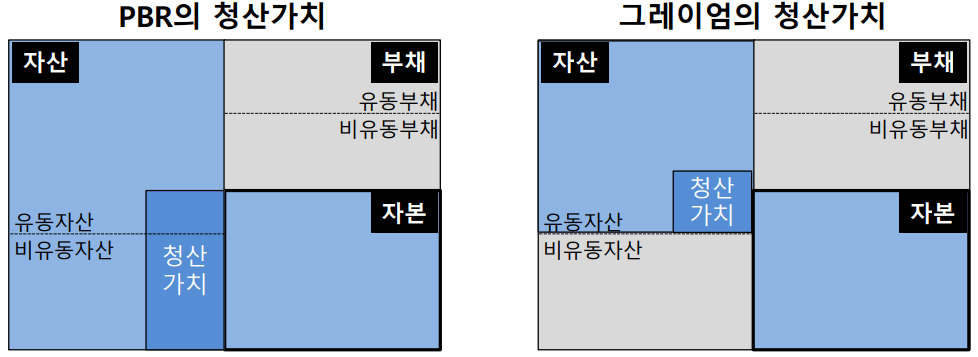

### [그레이엄표 안전 마진]
-> 청산가치가 시가총액 1.5이상인 기업에 투자하는 전략을 제시

안전마진 = 청산가치 - (시가총액 x 1.5) = (유동자산 - 부채) - (시가총액 x 1.5)

In [26]:
df = fs.fn_single(otp=OTP, symbol='FB', window='T') # 페이스북(FB) 재무제표 데이터 불러오기

* NCAV = 유동자산 - 총부채
* 시가총액 = 주가 x 주식수
* 안전마진 = NCAV - 시가총액 x 1.5

In [27]:
df['NCAV'] = df['Current Assets'] - df['Total Liabilities'] # NCAV 계산
df['Market Cap'] = df['Price'] * df['Shares'] # 시가총액 계산
df['Safety Margin'] = df['NCAV'] - df['Market Cap'] * 1.5 # 안전마진 계산

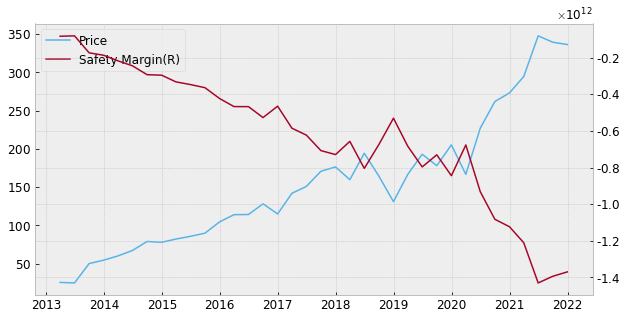

In [28]:
fs.draw_chart(df, left='Price', right='Safety Margin') # 주가와 안전대비 비교 그래프

-> 주가가 올라갈수록 안전마진이 떨어짐 (투자자에게 인기 있는 회사이니 당연한 일)

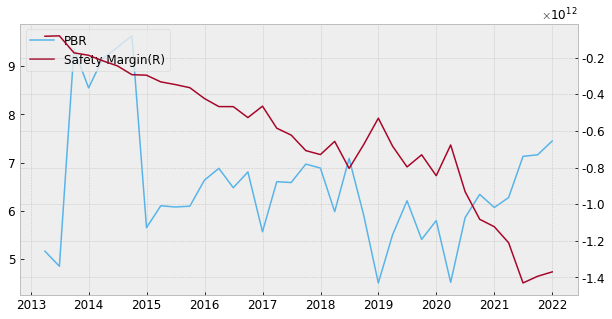

In [29]:
# PBR과 비교
df['PBR'] = df['Price'] / (df['Shareholders Equity'] / df['Shares']) # PBR 계산
fs.draw_chart(df, left='PBR', right='Safety Margin') # PBR과 안전마진 비교 그래프

-> 2022년 안전마진과 PBR이 많이 벌어짐 -> 청산가치가 줄어들었다는 의미이고, 이것은 부채가 늘거나 비유동자산이 늘어난 것이 원인일수도

### [백테스팅]
: 10년간 테스트하고, 리밸런싱은 3개월 후 (안전마진이 있는 종목은 흔하지 않기 때문에 거래량 요건을 조금 완화해서 테스트하기)

In [30]:
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp=OTP, term=t, vol=10000) # 분기별 재무제표 데이터 불러오기 (거래량 기준을 1만두로 지정 -> vol)

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK


In [31]:
for t in terms:
  data[t]['NCAV'] = data[t]['Current Assets'] - data[t]['Total Liabilities'] # 분기별 NCAV 계산
  data[t]['Market Cap'] = data[t]['Price_M3'] * data[t]['Shares'] # 분기별 시가총액 계산
  data[t]['Safety Margin'] = data[t]['NCAV'] - data[t]['Market Cap'] * 1.5 # 분기별 안전마진 계산

In [32]:
s = {}
signal = {}
for t in terms:
  s[t] = fs.fn_filter(data[t], by='Safety Margin', floor=0, n=30, asc=False) # 안전마진 기준 '상위' 30개 종목 선정
  signal[t] = list(s[t].index) # 선정된 종목 저장

In [33]:
df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 백테스팅

CAGR: 27.32%
Accumulated return: 1021.61%
Investment period: 10.0yrs
Sharpe ratio: 3.33
MDD: -11.85%


-> 수익률이 훌륭하며 샤프비유도 준수하고, MDD 역시 수익률에 비해 높지 않은 훌륭한 전략

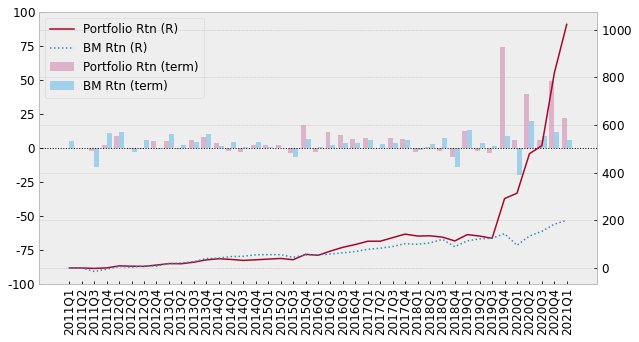

In [34]:
fs.draw_return(df) # 기간별 수익률 그래프

-> 증시 하락기의 방어 능력이 좋고 상승기에는 잘 올라타는 전략처럼 보임

### [각 분기에 몇 개의 종목이 선정되었는지 조회]
: 분기별로 선정된 종목은 signal 딕셔너리에 저장되어 있음

In [35]:
for k, v in signal.items():
  print(k, len(v)) # 증시가 불황일 때는 30개가 다 찬 적도 있지만 30개를 미처 못 채운 분기가 많이 보임

2010Q4 0
2011Q1 3
2011Q2 15
2011Q3 11
2011Q4 8
2012Q1 15
2012Q2 11
2012Q3 14
2012Q4 10
2013Q1 10
2013Q2 9
2013Q3 6
2013Q4 7
2014Q1 8
2014Q2 8
2014Q3 7
2014Q4 7
2015Q1 8
2015Q2 10
2015Q3 12
2015Q4 9
2016Q1 15
2016Q2 10
2016Q3 16
2016Q4 7
2017Q1 14
2017Q2 14
2017Q3 9
2017Q4 9
2018Q1 10
2018Q2 12
2018Q3 18
2018Q4 19
2019Q1 18
2019Q2 24
2019Q3 24
2019Q4 30
2020Q1 30
2020Q2 30
2020Q3 22
2020Q4 16


# 7. 성장주 투자가 하고 싶다면, PEG(주가수익성장비율)
* 앞서 살펴본 PER, PBR, PSR, PCR은 *실적 대비 저평가된 가치주*를 찾는 기술
* 성장주 : 가치주와 반대되는 개념, 실적과 주가가 하루가 다르게 성장(ex. 페이스북, 애플 등)
* 성장주 투자는 *미래 성장 기대감에 베팅*하는 것 -> 과거 실적을 가지고 밸류에이션 하는 가치투자 방법이 적합하지 않음 -> 이럴 때 사용하는 지표가 **PEG(주가수익성장비율)**
* 주식의 저평가/고평가 여부를 판단할 때 현재의 이익만이 아니라 이익의 성장률을 함께 고려해서 만든 식

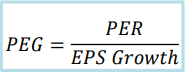

    * PER이 작을수록 또는 EPS 성장률이 클수록 PEG가 낮아짐
    * PEG가 1보다 작으면 저평가 종목
    * 피터 린치 : PEG가 0.5 미만이면 매수하고, 1.5 이상이면 매도



In [36]:
df = fs.fn_single(otp=OTP, symbol='AAPL', window='T') # 애플(AAPL) 재무제표 데이터 불러오기

* 성장률 구하는 공식 = (New - Old) / Old x 100 이지만 주당순이익인 EPS는 마이너스가 나오는 경우도 종종 있음 -> 그래서 성장률 구할 때는 분모 Old에 절댓값(abs)을 씌워줌
* 전년 EPS는 데이터프레임.shift() 함수를 이용해 df['EPS'].shift(4)로 구함 (4분기전이라는 의미)

In [37]:
df['PER'] = df['Price'] / df['EPS'] # PER 계산
df['EPS Growth'] = (df['EPS'] - df['EPS'].shift(4)) / abs(df['EPS'].shift(4)) * 100 # EPS 성장률 계산
df['PEG'] = (df['Price'] / df['EPS']) / df['EPS Growth'] # PEG 계산 

In [38]:
df[['EPS', 'EPS Growth', 'PER', 'PEG']].tail(10) # EPS, EPS 성장률, PER, PEG columns의 마지막 10개 데이터

,EPS,EPS Growth,PER,PEG
2019-09-30,2.98,-0.25,18.76,-74.84
2019-12-31,3.19,3.99,23.01,5.76
2020-03-31,3.22,7.34,19.76,2.69
2020-06-30,3.32,12.26,27.47,2.24
2020-09-30,3.30,10.47,35.12,3.35
2020-12-31,3.72,16.54,35.69,2.16
2021-03-31,4.47,39.01,27.31,0.70
2021-06-30,5.12,54.22,26.75,0.49
2021-09-30,5.62,70.43,25.18,0.36
2021-12-31,6.04,62.47,29.40,0.47


-> 최근 10분기 중 단 한 번을 제외하고 꾸준히 성장하고 있음을 알 수 있음

In [39]:
# 비교를 위해 AMZN의 PEG를 산출
df = fs.fn_single(otp=OTP, symbol='AMZN', window='T') # 아마존(AMZN) 재무제표 데이터 불러오기
df['PER'] = df['Price'] / df['EPS'] # PER 계산
df['EPS Growth'] = (df['EPS'] - df['EPS'].shift(4)) / abs(df['EPS'].shift(4)) * 100 # EPS 성장률 계산
df['PEG'] = (df['Price'] / df['EPS']) / df['EPS Growth'] # PEG 계산 
df[['EPS', 'EPS Growth', 'PER', 'PEG']].tail(10) # EPS, EPS 성장률, PER, PEG columns의 마지막 10개 데이터

,EPS,EPS Growth,PER,PEG
2019-09-30,23.05,25.75,75.31,2.92
2019-12-31,23.45,13.50,78.80,5.84
2020-03-31,21.30,-13.20,91.54,-6.93
2020-06-30,26.48,7.42,104.19,14.03
2020-09-30,34.80,50.98,90.48,1.77
2020-12-31,42.30,80.38,77.00,0.96
2021-03-31,53.01,148.87,58.37,0.39
2021-06-30,57.64,117.67,59.68,0.51
2021-09-30,51.14,46.95,64.24,1.37
2021-12-31,64.82,53.24,51.44,0.97


-> AMZN의 PEG를 보면 한 번을 제외하고는 꾸준히 성장하고 있음을 알 수 있음

### [백테스팅]
: 분기별로 PEG 값이 낮은 순서대로 상위 30개 종목에 투자하는 전략을 테스트

In [40]:
# PEG
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1') # 2011년 1분기 ~ 2021년 1분기
data = {}
for t in terms:
  data[t] = fs.fn_consolidated(otp=OTP, term=t) # 분기별 재무제표 데이터 불러오기

s = {}
signal = {}
for t in terms:
  t_4 = fs.quarters_before(terms, t, 4) # 4분기 이전 = 1년전 (비교 대상인 과거 분기를 설정)
  data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS'] # 분기별 PER 계산
  data[t]['EPS Growth'] = (data[t]['EPS'] - data[t_4]['EPS']) / abs(data[t_4]['EPS']) * 100 # 분기별 EPS 성장률 계산
  data[t]['PEG'] = data[t]['PER'] / data[t]['EPS Growth'] # 분기별 PEG 계산 
  data[t].loc[(data[t]['PER'] <= 0) | (data[t]['PEG'] <= 0), 'PEG'] = float('nan') # PER이 음수 or EPS 성장률이 음수인 경우 nan 처리

  s[t] = fs.fn_filter(data[t], by='PEG', floor=.1, cap=1, n=30, asc=True) # PEG 기준 하위 30개 종목 선정
  signal[t] = list(s[t].index) # 선정된 종목 저장

df = fs.backtest(signal=signal, data=data, m=3, cost=.001) # 백테스팅

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 9.48%
Accumulated return: 147.66%
Investment period: 10.0yrs
Sharpe ratio: 0.71
MDD: -38.26%


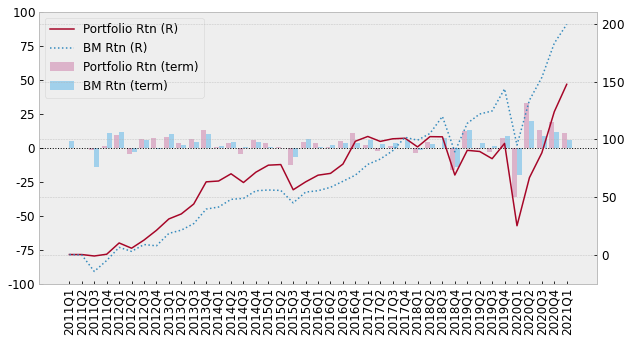

In [41]:
fs.draw_return(df) # 좋은 전략은 아님